<a href="https://colab.research.google.com/github/skaty5678/customer-retail-segmentation/blob/main/customer_retail_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN, KMeans, OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

import plotly.express as px
import calendar
from datetime import timedelta
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df  = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
eda_df = raw_df.copy()

In [ ]:
eda_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
eda_df.shape

(541909, 8)

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
eda_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
eda_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
eda_df[['Quantity', 'UnitPrice']] = eda_df[['Quantity', 'UnitPrice']].apply(lambda x: np.where(x > 0, x, np.nan))

In [ ]:
eda_df.dropna(inplace = True)

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  float64       
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.3+ MB


In [ ]:
eda_df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# extracting time related features from InvoiceDate

eda_df['Invoice_date'] = eda_df['InvoiceDate'].dt.date
eda_df["Invoice_year"] = eda_df["InvoiceDate"].dt.year
eda_df["Invoice_month"] = eda_df["InvoiceDate"].dt.month
eda_df["Invoice_day"] = eda_df["InvoiceDate"].dt.day
eda_df["Invoice_week"] = eda_df["InvoiceDate"].dt.day_of_week

eda_df["FinalPrice"] = eda_df["Quantity"] * eda_df["UnitPrice"]

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  float64       
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   Invoice_date   397884 non-null  object        
 9   Invoice_year   397884 non-null  int64         
 10  Invoice_month  397884 non-null  int64         
 11  Invoice_day    397884 non-null  int64         
 12  Invoice_week   397884 non-null  int64         
 13  FinalPrice     397884 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(5

In [ ]:
ref_date = eda_df["Invoice_date"].max() + timedelta(days=1)

df_customers = eda_df.groupby("CustomerID").agg({
    "Invoice_date": lambda x : (ref_date - x.max()).days,
    "InvoiceNo": "nunique",
    "FinalPrice": "sum"
}).rename(columns={
    "Invoice_date": "Recency",
    "InvoiceNo": "Frequency",
    "FinalPrice": "MonetaryValue"
})

In [ ]:
df_customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


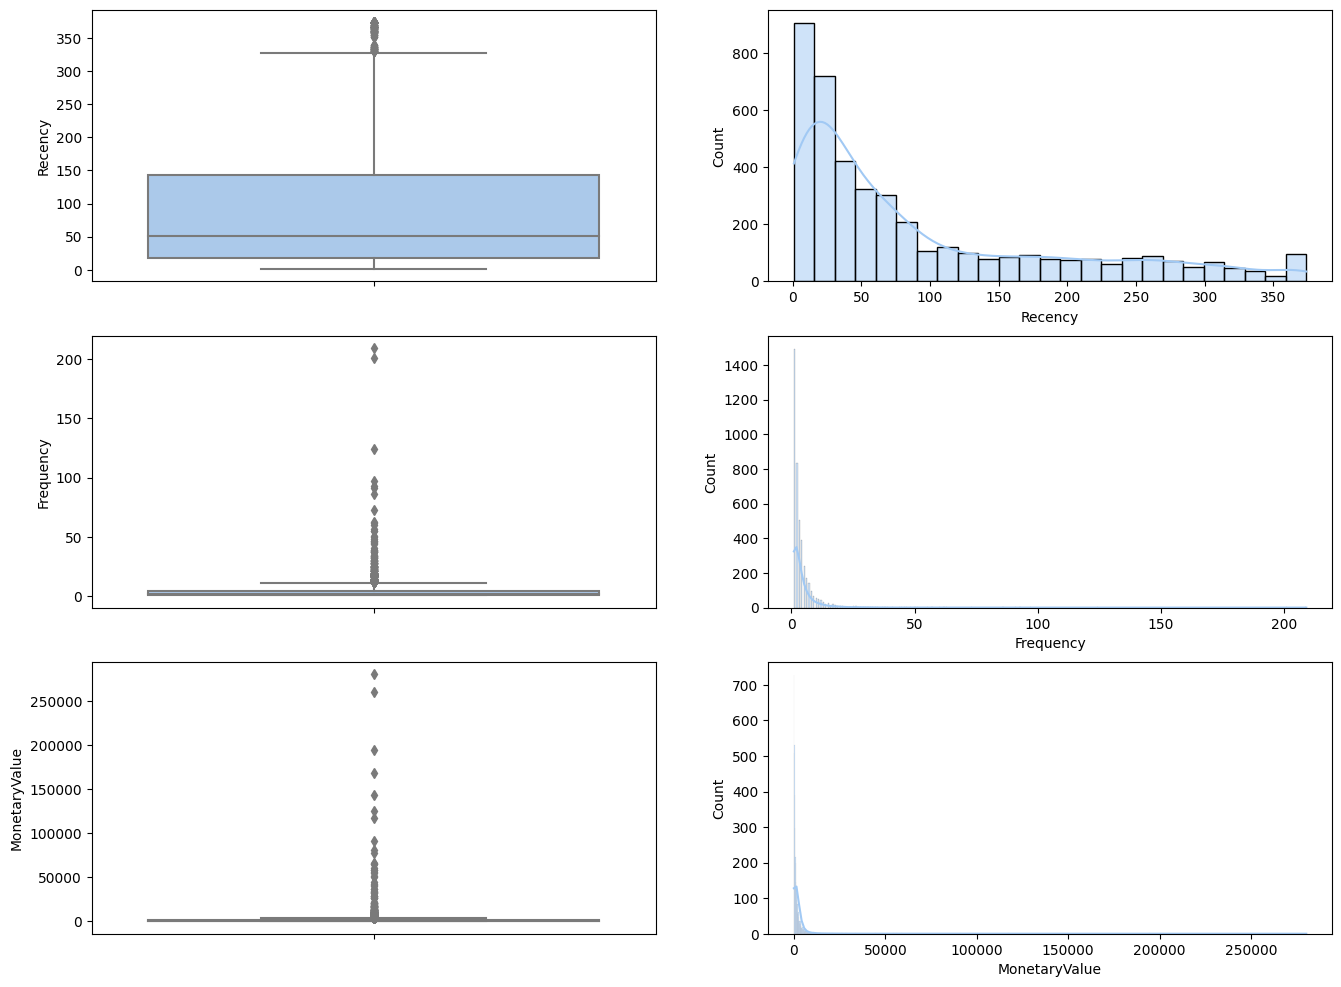

In [ ]:
n_cols = len(df_customers.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(16, n_cols * 4))

for i, col in enumerate(df_customers.columns):
    sns.boxplot(data=df_customers, y=col, ax=axes[i][0])
    sns.histplot(data=df_customers, x=col, kde=True, ax=axes[i][1])

fig.show()

In [ ]:
def remove_outliers_iqr(df, column, threshold):
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Remove the outliers from the dataframe
    df.drop(outliers.index, inplace=True)

    # Print the number of outliers removed
    print(f"Number of outliers removed from: {column}, {len(outliers)}")

In [ ]:
for column in df_customers.columns:
  threshold = 1.5
  remove_outliers_iqr(df_customers, column, threshold)

Number of outliers removed from: Recency, 155
Number of outliers removed from: Frequency, 284
Number of outliers removed from: MonetaryValue, 297


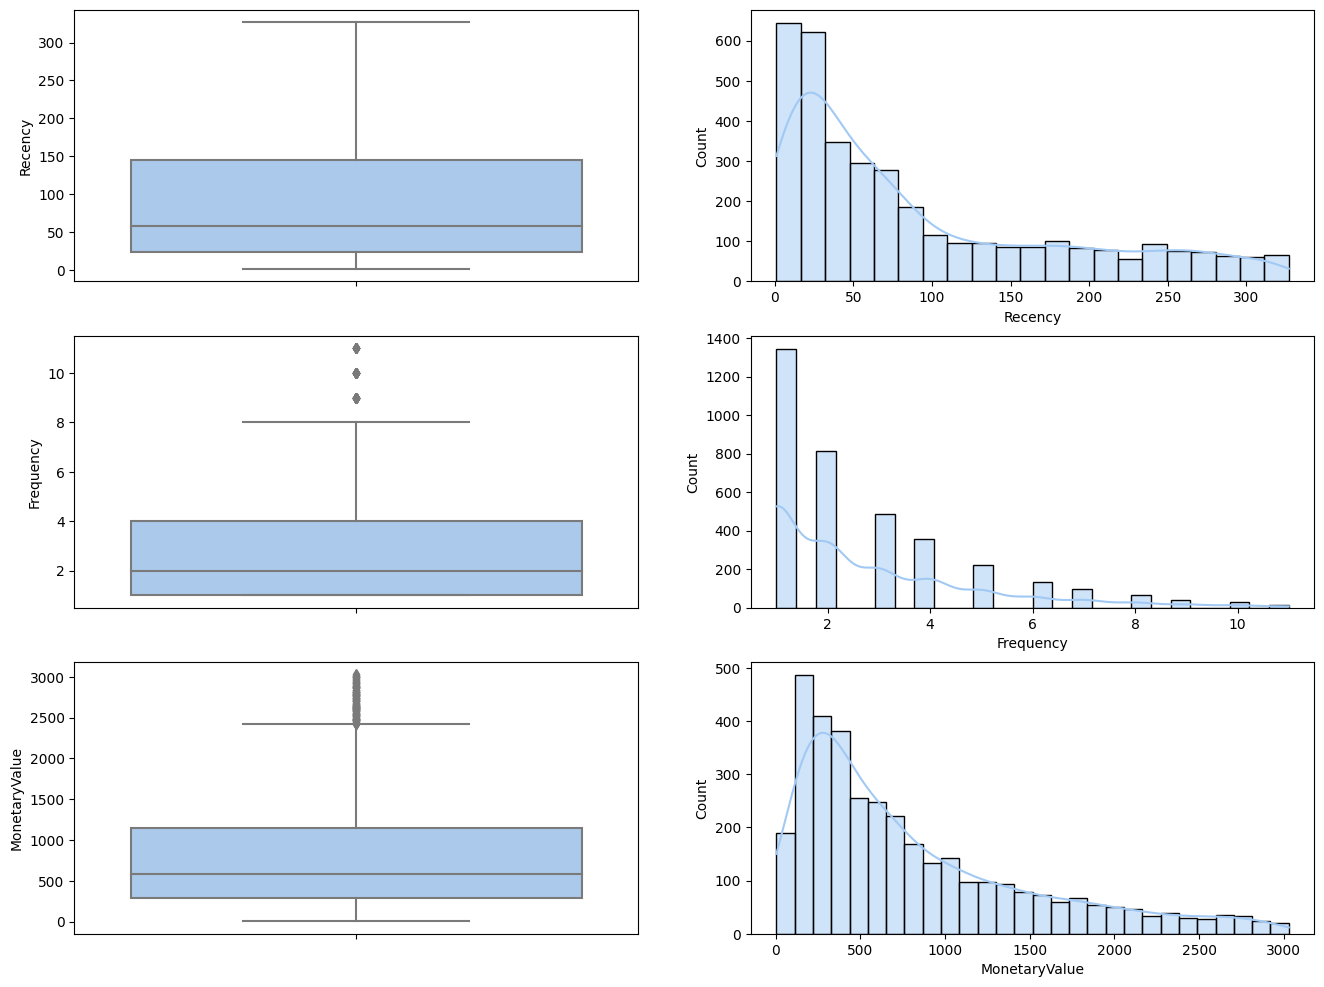

In [ ]:
n_cols = len(df_customers.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(16, n_cols * 4))

for i, col in enumerate(df_customers.columns):
    sns.boxplot(data=df_customers, y=col, ax=axes[i][0])
    sns.histplot(data=df_customers, x=col, kde=True, ax=axes[i][1])

fig.show()

In [ ]:


country_revenue = eda_df.groupby("Country")["FinalPrice"].sum().sort_values(ascending=False).reset_index()

fig = px.bar(country_revenue, x="Country", y="FinalPrice",
             labels={"FinalPrice": "Total Revenue"},
             title="Total Revenue by Country")

fig.update_traces(hovertemplate='Country: %{x}<br>Total Revenue: %{y:.2f}',
                  hoverlabel=dict(bgcolor="white", font_size=12),
                  marker_color='lightskyblue')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_title="Country",
                  yaxis_title="Total Revenue",
                  showlegend=False)

fig.show()


In [ ]:


revenue_month = eda_df.groupby(["Invoice_month"])["FinalPrice"].sum().reset_index()
revenue_month["Invoice_month"] = revenue_month["Invoice_month"].apply(lambda x: calendar.month_name[x])

fig = px.bar(revenue_month, x="Invoice_month", y="FinalPrice",
             labels={"Invoice_month": "Month", "FinalPrice": "Total Revenue"},
             title="Total Revenue by Month of the Year",
             color="FinalPrice",  # Use the "FinalPrice" column for color mapping
             color_continuous_scale="Blues")  # Specify the built-in color scale

fig.update_layout(xaxis_title="Month",
                  yaxis_title="Total Revenue",
                  showlegend=False)

fig.show()


In [ ]:
eda_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_date', 'Invoice_year',
       'Invoice_month', 'Invoice_day', 'Invoice_week', 'FinalPrice'],
      dtype='object')

In [ ]:
eda_df.Invoice_week.value_counts()

3    80035
2    68885
1    66473
0    64893
6    62773
4    54825
Name: Invoice_week, dtype: int64

In [ ]:


revenue_week = eda_df.groupby(["Invoice_week"])["FinalPrice"].sum().reset_index()
revenue_week['Invoice_week'] = revenue_week['Invoice_week'].apply(lambda x: calendar.day_name[x])

fig = px.bar(revenue_week, x="Invoice_week", y="FinalPrice",
             labels={"Invoice_week": "Week", "FinalPrice": "Total Revenue"},
             title="Total Revenue by Week of the Year",
             color="FinalPrice",  # Use the "FinalPrice" column for color mapping
             color_continuous_scale="Greens")  # Specify the built-in color scale

fig.update_layout(xaxis_title="Week",
                  yaxis_title="Total Revenue",
                  showlegend=False,
                  xaxis=dict(tickmode='array', tickvals=revenue_week.index, ticktext=revenue_week['Invoice_week']))

fig.show()


In [ ]:
top_10_customers = df_customers["MonetaryValue"].sort_values(ascending=False).head(10)
top_10_customers

CustomerID
16709.0    3029.87
12598.0    3023.08
18094.0    3017.30
12754.0    3010.74
12916.0    3006.15
15521.0    3000.20
17504.0    2997.03
12670.0    2996.05
14307.0    2995.72
15687.0    2993.10
Name: MonetaryValue, dtype: float64

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3602 entries, 12348.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3602 non-null   int64  
 1   Frequency      3602 non-null   int64  
 2   MonetaryValue  3602 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 112.6 KB


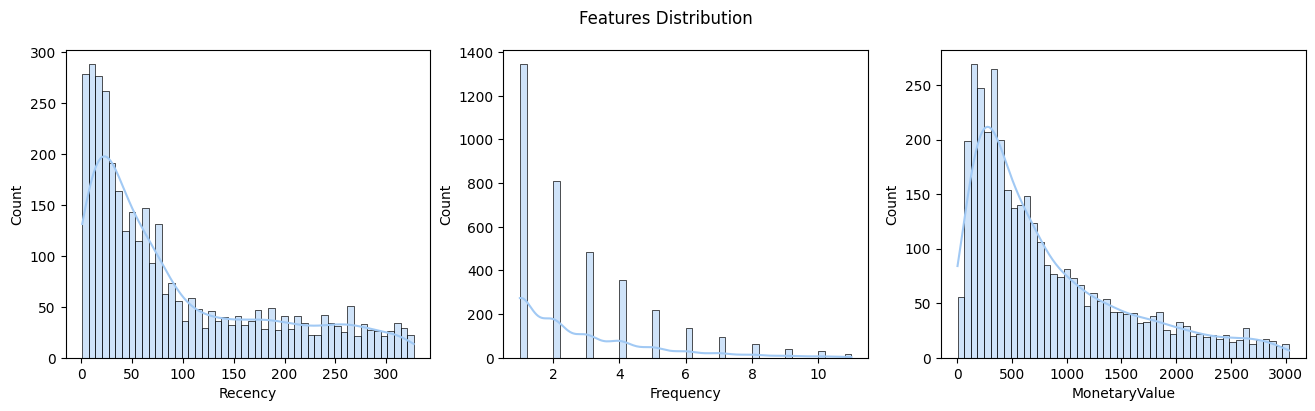

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Features Distribution")
sns.histplot(df_customers["Recency"], bins=50, ax=ax[0], kde=True)
sns.histplot(df_customers["Frequency"], bins=50, ax=ax[1], kde=True)
sns.histplot(df_customers["MonetaryValue"], bins=50, ax=ax[2], kde=True)
fig.show()

In [ ]:
df_customers.shape

(3602, 3)

In [ ]:
X = df_customers.copy()

In [ ]:
boxcox_t = PowerTransformer(method="box-cox")
log_t = FunctionTransformer(func=np.log, inverse_func=np.exp)
sqrt_t = FunctionTransformer(func=np.sqrt, inverse_func=lambda x : x ** 2)
cbrt_t = FunctionTransformer(func=np.cbrt, inverse_func=lambda x : x ** 3)

X_boxcox = boxcox_t.fit_transform(X)
X_log = log_t.fit_transform(X).values
X_sqrt = sqrt_t.fit_transform(X).values
X_cbrt = cbrt_t.fit_transform(X).values

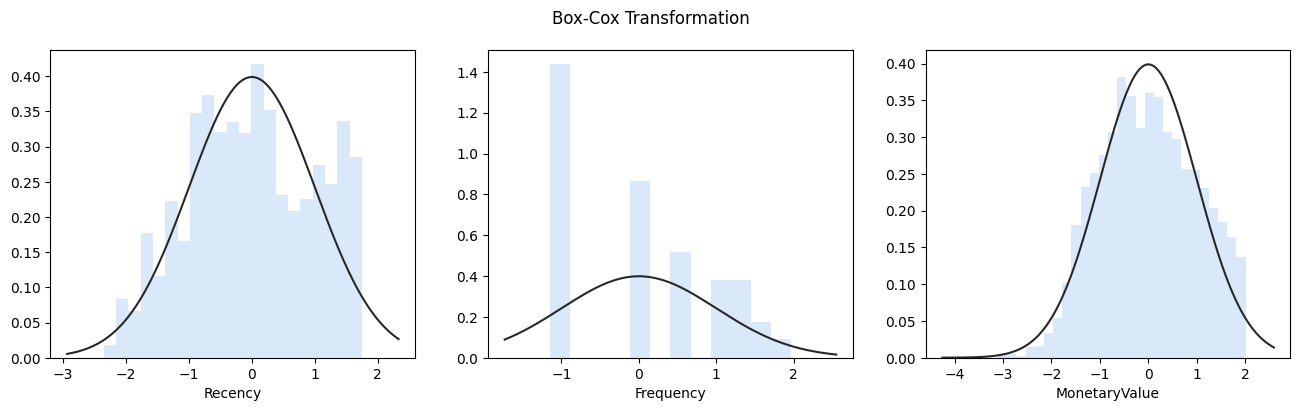

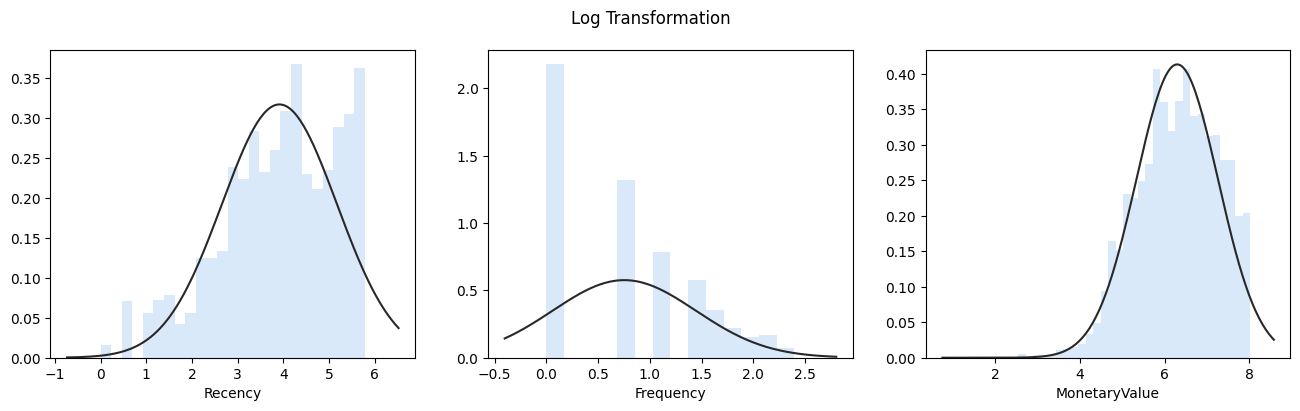

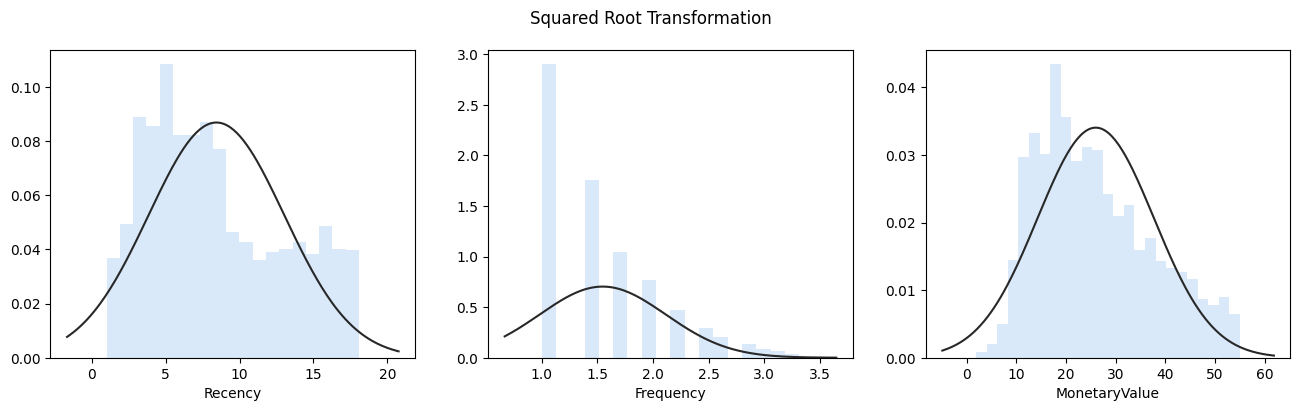

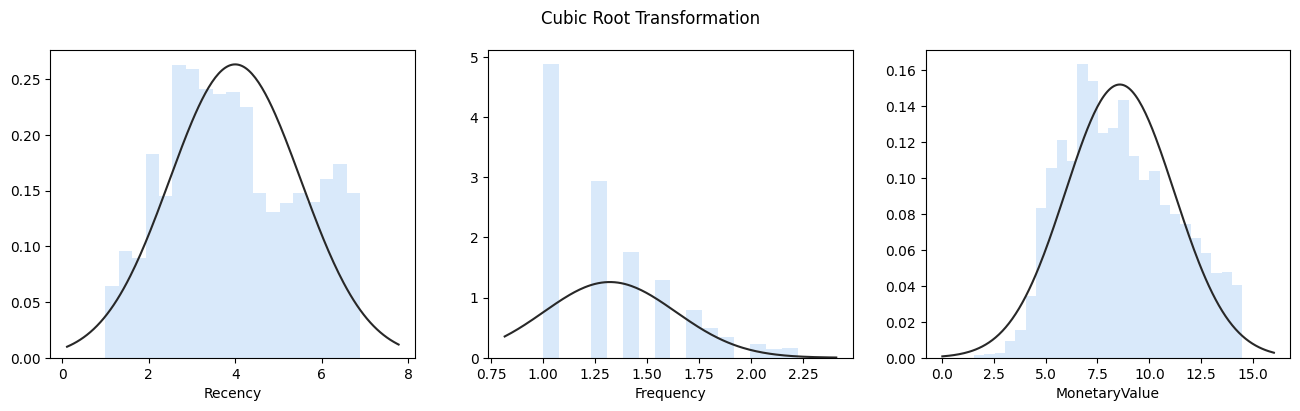

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Box-Cox Transformation")
for i in range(3):
    ax = axes[i]
    sns.distplot(X_boxcox[:,i], fit=norm, kde=False, ax=ax)
    ax.set_xlabel(df_customers.columns[i])
    
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Log Transformation")
for i in range(3):
    ax = axes[i]
    sns.distplot(X_log[:,i], fit=norm, kde=False, ax=ax)
    ax.set_xlabel(df_customers.columns[i])
    
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Squared Root Transformation")
for i in range(3):
    ax = axes[i]
    sns.distplot(X_sqrt[:,i], fit=norm, kde=False, ax=ax)
    ax.set_xlabel(df_customers.columns[i])
    
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Cubic Root Transformation")
for i in range(3):
    ax = axes[i]
    sns.distplot(X_cbrt[:,i], fit=norm, kde=False, ax=ax)
    ax.set_xlabel(df_customers.columns[i])

In [ ]:
# Create a StandardScaler instance
standard_scaler = StandardScaler()

# Define the transformers for the ColumnTransformer
trans = ColumnTransformer(
    [
        ('boxcox', boxcox_t, ['Frequency']),        # Apply boxcox_t transformation to 'Frequency' column
        ("cbrt", cbrt_t, ["Recency", "MonetaryValue"])  # Apply cbrt_t transformation to 'Recency' and 'MonetaryValue' columns
    ],
    remainder='passthrough'  # Passthrough any remaining columns without transformation
)

# Create the preprocessing pipeline
preprocessing = Pipeline(
    [
        ('transformers', trans),  # Apply the ColumnTransformer
        ('scaler', standard_scaler),  # Scale the data using StandardScaler
    ]
)


In [ ]:
import random
seed = 42
random.seed(seed)
np.random.seed(seed)

In [ ]:
kmeans = KMeans(random_state=seed)

clusterer = Pipeline([
    ("preprocessing", preprocessing),
    ("kmeans", kmeans)
])

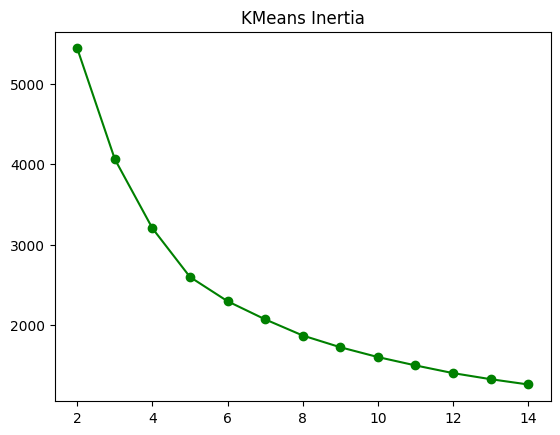

In [ ]:
n_clusters = np.arange(2, 15)  # Define the range of cluster numbers to try
inertia = []  # List to store the inertia values

# Iterate over the range of cluster numbers
for k in n_clusters:
    kmeans = clusterer.steps[-1][1]  # Get the KMeans estimator from the clusterer pipeline
    kmeans.set_params(n_clusters=k)  # Set the number of clusters for KMeans
    clusterer.fit(X)  # Fit the clusterer on the data
    inertia.append(kmeans.inertia_)  # Append the inertia value to the list

# Plot the KMeans inertia values
plt.title("KMeans Inertia")
plt.plot(n_clusters, inertia, color="green", marker="o")  # Plot the inertia values
plt.show()


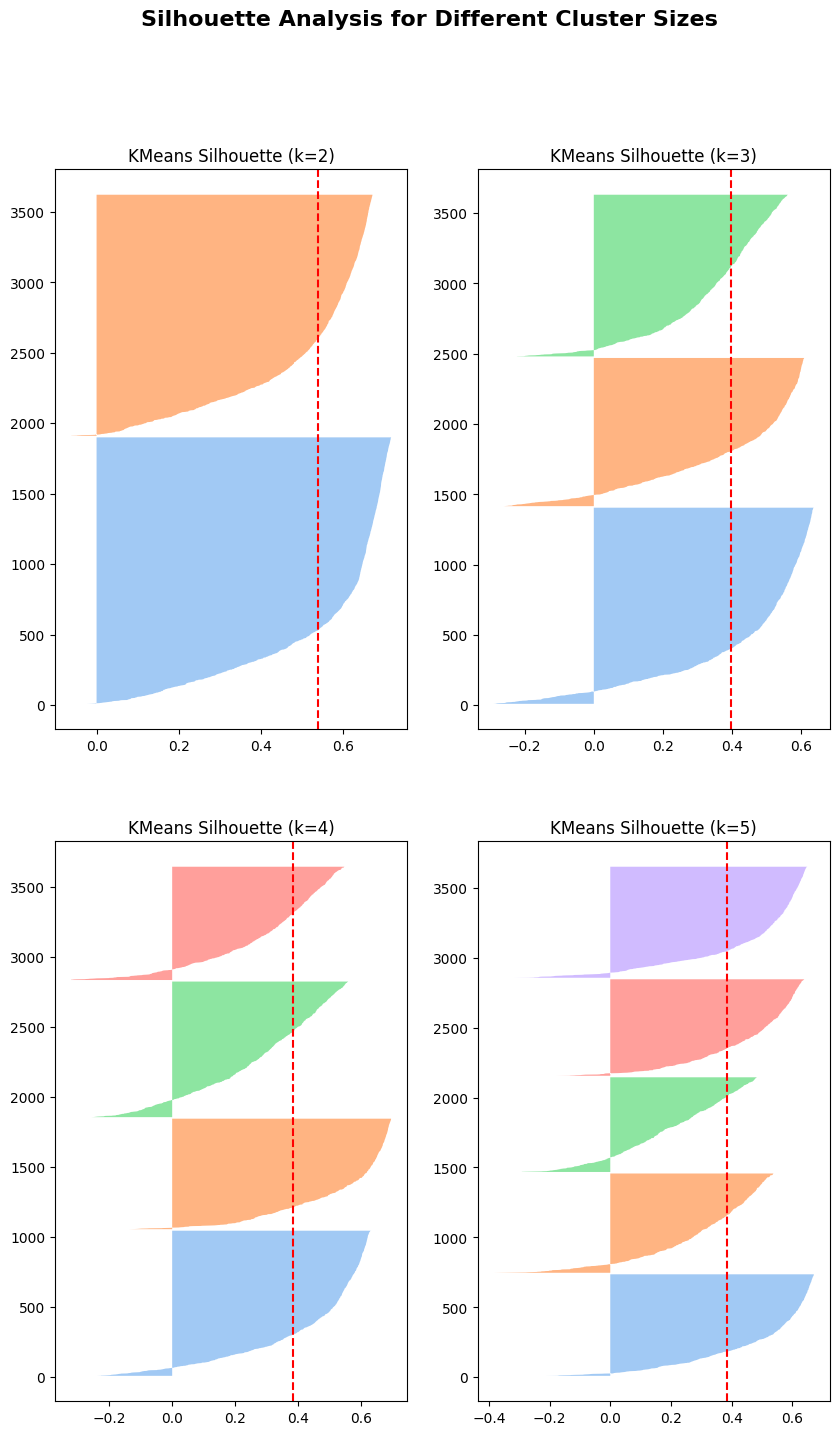

In [ ]:
n_clusters = np.arange(2, 6)  # Define the range of cluster numbers to try

def plot_silhouettes(X, labels, ax):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    ax.set_title(f"KMeans Silhouette (k={n_clusters})")
    
    avg_silhouette = silhouette_score(X, labels, random_state=seed)
    clusters_silhouettes = silhouette_samples(X, labels)
    
    y_lower = 10
    for i in (unique_labels):
        cluster_silhouettes = np.sort(clusters_silhouettes[labels == i])
        cluster_size = len(cluster_silhouettes)
        
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouettes,
        )
        
        y_lower = y_upper + 10
        
    ax.axvline(avg_silhouette, color="red", linestyle="--")

n_cols = 2  # Number of subplot columns
n_rows = math.ceil(len(n_clusters) / n_cols)  # Number of subplot rows based on the cluster range
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 8))  # Create the subplots

# Iterate over each cluster number
for i, k in enumerate(n_clusters):
    ax = axes[i // n_cols][i % n_cols]  # Get the current subplot
    kmeans = clusterer.steps[-1][1]  # Get the KMeans estimator from the clusterer pipeline
    kmeans.set_params(n_clusters=k)  # Set the number of clusters for KMeans
    labels = clusterer.fit_predict(X)  # Fit and predict cluster labels
    X_transf = clusterer.transform(X)  # Transform the data with the clusterer
    plot_silhouettes(X_transf, labels, ax)  # Plot the silhouettes in the current subplot

# Remove unused axes if there are any
i += 1
while i < (n_rows * n_cols):
    ax = axes[i // n_cols][i % n_cols]
    ax.remove()

fig.suptitle("Silhouette Analysis for Different Cluster Sizes", fontsize=16, fontweight="bold")
# Display the plot
plt.show()


In [ ]:
kmeans = clusterer.steps[-1][1]
kmeans.set_params(n_clusters=2)
labels = clusterer.fit_predict(X)
df_customers["Label"] = labels
df_customers.head()

,Recency,Frequency,MonetaryValue,Label
CustomerID,,,,
12348.0,76,4,1797.24,1
12349.0,19,1,1757.55,1
12350.0,311,1,334.40,0
12352.0,37,8,2506.04,1
12353.0,205,1,89.00,0


In [ ]:
X_transf = preprocessing.fit_transform(X)

fig = px.scatter_3d(df_customers, x="Recency", y="Frequency", z="MonetaryValue", color=df_customers["Label"])
fig.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Update the clusterer pipeline
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Set the parameters for DBSCAN
clusterer = Pipeline([
    ("preprocessing", preprocessing),
    ("dbscan", dbscan)
])

# Update the silhouette analysis plot function
def plot_silhouettes(X, labels, ax):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    ax.set_title(f"DBSCAN Silhouette")
    
    avg_silhouette = silhouette_score(X, labels)
    clusters_silhouettes = silhouette_samples(X, labels)
    
    y_lower = 10
    for i in (unique_labels):
        cluster_silhouettes = np.sort(clusters_silhouettes[labels == i])
        cluster_size = len(cluster_silhouettes)
        
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouettes,
        )
        
        y_lower = y_upper + 10
        
    ax.axvline(avg_silhouette, color="red", linestyle="--")

# Update the scatter plot
fig = px.scatter_3d(df_customers, x="Recency", y="Frequency", z="MonetaryValue", color=df_customers["Label"], opacity=0.8)
fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary Value'))
fig.show()


In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
print(f"Number of clusters: {len(unique_labels) - 1}")  # Subtract 1 to exclude the noise label
print(f"Cluster labels: {unique_labels}")
print(f"Cluster sizes: {label_counts[1:]}")  # Exclude the noise label count


Number of clusters: 1
Cluster labels: [0 1]
Cluster sizes: [1711]
